In [37]:
import numpy as np
rng = np.random.default_rng()
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget
cmap = matplotlib.colormaps.get('tab10').colors

In [41]:
def get_lattice_vectors(scale, binding_angle, initial_length=1):
    '''
    Function that returns the lattice vectors of a 2D lattice. It takes the following arguments:
    - scale: The scale of the lattice vectors (e.g. 2 means one lattice vector is twice as long as the initial_length)
    - binding_angle: The angle between two connections (e.g. 120 degrees for a hexagonal lattice)
    - initial_length: The length of the x lattice vector
    '''
    e1 = np.array([initial_length,0])
    e2 = np.array([initial_length*np.sin(np.radians(binding_angle-90)),initial_length*np.cos(np.radians(binding_angle-90))])
    e2 = e2*scale
    return e1, e2

def get_nodes(e1, e2, size=[10,10]):
    '''
    Function that returns the array of nodes in the 2D lattice. It takes the following arguments:
    - e1: The first lattice vector
    - e2: The second lattice vector
    - size: The size of the lattice in nodes
    '''
    nodes = []
    for i in range(size[0]):
        for j in range(size[1]):
            node = j*e1+i*e2
            nodes.append([node[0], node[1]])
    nodes = np.array(nodes)
    return nodes

def add_noise(nodes, noise_level=0.1):
    '''
    Function that adds noise to the nodes of a lattice. It takes the following arguments:
    - nodes: The array of nodes
    - noise_level: The standard deviation of the noise
    '''
    noise = rng.normal(0, noise_level, nodes.shape)
    return nodes + noise

def get_connections(nodes, size):
    max_index = len(nodes)
    edges = []
    for i, node in enumerate(nodes):
        if i+1 < max_index and (i+1)%size[1] != 0:
            edges.append([i, i+1])
        if i+size[1] < max_index:
            edges.append([i, i+size[1]])
    return np.array(edges)

def plot_graph(nodes, connections):
    fig,ax = plt.subplots()
    t = 0
    for edge in connections:
        t += 1
        ax.plot([nodes[edge[0]][0], nodes[edge[1]][0]], [nodes[edge[0]][1], nodes[edge[1]][1]], 'k-')
    ax.plot(nodes[:,0], nodes[:,1], 'ro')
    ax.set_aspect('equal')

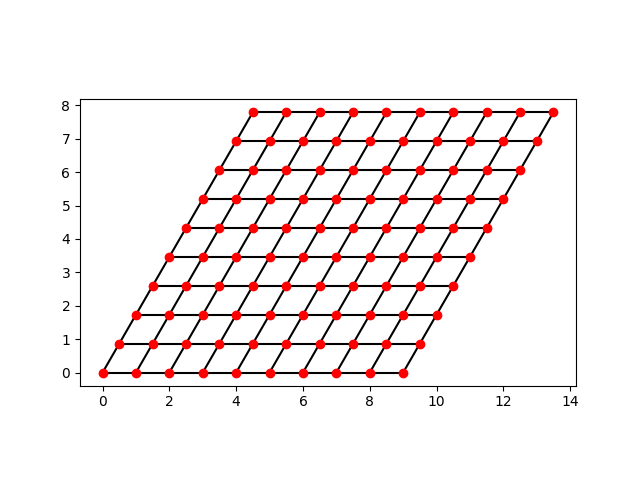

In [45]:
size = [10,10]
e1, e2 = get_lattice_vectors(1, 120, 1)
nodes = get_nodes(e1,e2, size)
#nodes = add_noise(nodes)
connections = get_connections(nodes, size)
plot_graph(nodes, connections)
